In [1]:
from collections import deque
from dqnagentv5 import DQNAgent
from environmentv5 import Environment
from honestagentv5 import HonestAgent
import gym
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import progressbar as pb
import random
import seaborn as sns
from selfishagentv5 import SelfishAgent
import torch
%matplotlib inline

In [2]:
rhos = [
(1/3, 0.33475494384765625),
(0.35, 0.36702728271484375),
(0.4, 0.47370147705078125),
(0.45, 0.6032638549804688)
]
ADOPT = 0
OVERRIDE = 1
WAIT = 2

# current rho
rho = 0.47370147705078125
def evalReward(reward):
    reward = (1 - rho) * reward[0] - rho * reward[1]
    return reward

In [3]:
mining_powers = [0.60, 0.40]
gammas = [0.5, 0.5]
T = 9
env = Environment(mining_powers, gammas, T)
max_blocks = int(1e4)
agents = [HonestAgent(), DQNAgent(state_size=2, action_size=3, seed=0)]
# agents = [HonestAgent(), SelfishAgent(T)]

In [8]:
def runTurn(eps, verbose=0):
    turn_reward = 0
    current_player = env.getNextBlockWinner()
    current_player_state = env.getState(current_player)
    current_player_action = agents[current_player].act(current_player_state, eps)
    if verbose: 
        print('current chain: ', env.chain)
        print(current_player, current_player_state, current_player_action)
    new_state, reward = env.takeActionPlayer(current_player, current_player_action)
    reward_val = evalReward(reward)
    agents[current_player].step(
        current_player_state, current_player_action, reward_val, new_state)
    if current_player == 1:
        turn_reward += reward_val
    if (current_player_action == OVERRIDE) and (current_player_state[0] > current_player_state[1]):
        turn_queue = deque()
        [turn_queue.append(i) for i in range(len(mining_powers)) if i != current_player]
        while len(turn_queue):    
            current_player = turn_queue.pop()
            current_player_state = env.getState(current_player)
            current_player_action = agents[current_player].act(current_player_state, eps)
            if verbose: print(current_player, current_player_state, current_player_action)
            new_state, reward = env.takeActionPlayer(current_player, current_player_action)
            reward_val = evalReward(reward)
            print(current_player, current_player_state, current_player_action)
            agents[current_player].step(
                current_player_state, current_player_action, reward_val, new_state)
            if current_player == 1:
                turn_reward += reward_val
            if (current_player_action == OVERRIDE) and (current_player_state[0] > current_player_state[1]):
                [turn_queue.append(i) for i in range(len(mining_powers)) if i != current_player]
        if verbose: print('next chain: ', env.chain)
    return turn_reward

In [9]:
def plotPolicy(agent):
    # plot 
    policy = agent.extractPolicy()
    f, ax = plt.subplots(figsize=(3,3))
    ax.imshow(policy)
    ax = sns.heatmap(policy, annot=True)
    cb = ax.collections[-1].colorbar   
    cb.remove()
    plt.xticks([])
    plt.yticks([])
    plt.show()

## Learning

1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 1
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 0
1 (1, 1) 1
1 (0, 1) 1
0 (0, 1) 0
1 (1, 1) 1
1 (0, 1) 1
0 (0, 1) 0
0 (0, 2) 0
1 (0, 1) 2
1 (0, 2) 1
1 (1, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (1, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 1
0 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 1
0 (0, 1) 0
0 (0, 2) 0
1 (0, 1) 0
1 (0, 1) 2
1 (2, 2) 1
1 (0, 1) 0
1 (0, 1) 0
1 (1, 1) 0
1 (2, 1) 2
0 (0, 3) 0
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 2
1 (2, 2) 1
0 (0, 2) 0
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 1
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 1
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 2
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 0
1 (1, 1) 2
1 (1, 2) 1
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 0

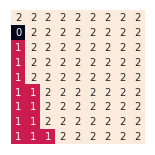

1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 1
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 1
1 (0, 1) 0
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 1
0 (0, 3) 0
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 0
1 (0, 1) 2
1 (1, 1) 1
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 1
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 1
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 1
1 (0, 1) 1
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 1
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 2
1 (1, 1) 0
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 0
0 (0, 1) 0
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 0
1 (2, 1) 2
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 1
1 (1, 1) 1
1 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (1, 1) 0
1 (0, 1) 1
1 (0, 1) 1
0 (0, 1) 0

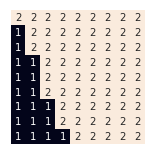

1 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 1
1 (0, 1) 2
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 2
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 0
0 (0, 1) 0
1 (1, 1) 0
1 (1, 1) 2
1 (1, 2) 0
1 (1, 1) 1
0 (0, 1) 0
1 (0, 1) 0
1 (2, 1) 0
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (1, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 0
1 (0, 1) 1
1 (1, 1) 1
1 (0, 1) 1
1 (1, 1) 2
1 (1, 2) 2
1 (2, 3) 2
1 (2, 4) 1
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 2
1 (1, 2) 2
1 (1, 3) 1
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 0
1 (1, 1) 1
1 (0, 1) 0
1 (1, 1) 2
1 (1, 2) 1
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 2
1 (0, 4) 2
1 (0, 5) 0
1 (0, 1) 2
1 (0, 1) 2
1 (0, 1) 1
0 (0, 1) 0
1 (0, 1) 0
0 (0, 2) 0
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 1
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 0
0 (0, 1) 0
0 (0, 2) 0
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 0
0 (0, 1) 0
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 1
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 0

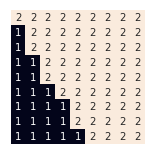

1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 1
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 1
1 (0, 1) 0
1 (1, 1) 1
1 (0, 1) 0
1 (0, 1) 0
0 (0, 1) 0
1 (1, 1) 0
1 (0, 1) 1
1 (0, 1) 1
1 (1, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (1, 1) 2
1 (0, 1) 1
1 (0, 1) 2
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 0
1 (0, 1) 2
1 (0, 2) 2
1 (1, 3) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 1
1 (1, 1) 2
1 (1, 2) 0
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 2
1 (0, 1) 2
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 2
1 (1, 2) 0
1 (0, 1) 2
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 1
0 (0, 1) 0
1 (1, 1) 1
1 (1, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 1
1 (1, 1) 2
1 (2, 2) 0
1 (0, 1) 2
1 (0, 1) 2
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
0 (0, 1) 0
0 (0, 2) 0

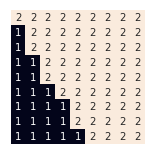

1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
0 (0, 1) 0
1 (0, 1) 2
1 (1, 2) 1
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 0
1 (3, 1) 2
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
0 (0, 1) 0
0 (0, 1) 0
1 (1, 1) 2
1 (1, 2) 1
1 (0, 1) 2
1 (0, 2) 0
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (1, 2) 2
1 (1, 3) 2
1 (1, 4) 2
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (1, 1) 1
1 (1, 1) 1
1 (0, 1) 1
1 (1, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 0
0 (0, 1) 0
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 1
1 (0, 1) 2
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 2
1 (1, 1) 2
1 (2, 2) 1
1 (0, 1) 1
1 (0, 1) 1
1 (1, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 0
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 0
0 (0, 2) 0
1 (0, 1) 1

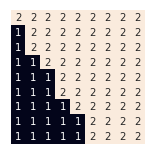

1 (0, 1) 0
1 (0, 1) 2
1 (1, 2) 2
1 (1, 3) 2
1 (1, 4) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
0 (0, 1) 0
0 (0, 1) 0
1 (2, 1) 1
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 1
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (1, 1) 2
1 (2, 2) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 2
0 (0, 2) 0
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 1
1 (1, 1) 2
1 (1, 2) 1
1 (1, 1) 2
1 (1, 2) 1
1 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 2
1 (0, 2) 1
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 1
1 (2, 1) 0
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 2
1 (1, 3) 2
1 (1, 4) 0
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 2
1 (0, 4) 1
1 (0, 1) 1
0 (0, 1) 0
1 (0, 1) 2
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 2

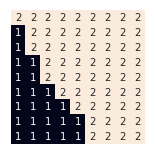

0 (0, 1) 0
0 (0, 2) 0
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
0 (0, 2) 0
1 (0, 1) 0
1 (1, 1) 0
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (1, 2) 1
0 (0, 1) 0
1 (1, 1) 0
0 (0, 1) 0
1 (2, 1) 0
1 (0, 1) 1
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 1
1 (1, 1) 2
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 2
1 (0, 2) 0
1 (1, 1) 1
1 (0, 1) 0
1 (1, 1) 1
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 2
1 (2, 2) 2
1 (3, 3) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 1
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 2
0 (0, 2) 0
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 2
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 2
1 (1, 2) 2
1 (2, 3) 2
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 2
1 (0, 1) 1
0 (0, 2) 0
1 (1, 1) 1
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 2
1 (0, 1) 0

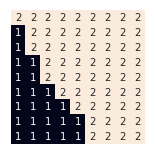

1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 0
1 (1, 1) 1
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 2
1 (0, 2) 1
1 (1, 1) 0
1 (0, 1) 2
1 (0, 1) 0
1 (0, 1) 2
0 (0, 2) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 0
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 1
1 (1, 1) 2
1 (1, 2) 0
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 2
1 (1, 1) 2
1 (2, 2) 2
1 (2, 3) 1
1 (1, 1) 1
0 (0, 1) 0
1 (1, 1) 0
0 (0, 1) 0
1 (1, 1) 2
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 0
1 (0, 1) 2
1 (1, 1) 1
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 2
1 (0, 4) 0
1 (0, 1) 2
1 (0, 2) 0
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 0
0 (0, 4) 0
1 (0, 1) 2
1 (0, 2) 0
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2

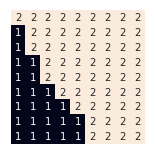

1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 2
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 2
1 (0, 2) 0
0 (0, 2) 0
1 (0, 1) 2
0 (0, 2) 0
1 (0, 1) 2
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 1
1 (1, 1) 1
1 (0, 1) 0
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (1, 2) 1
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 2
1 (1, 2) 0
1 (0, 1) 2
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 1
1 (1, 1) 2
1 (1, 2) 1
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 2
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 0
1 (1, 1) 1
1 (0, 1) 2
1 (0, 1) 2
1 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 2
1 (0, 4) 2
1 (0, 5) 1
1 (0, 1) 2
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 0
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 2
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 2
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 1
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
0 (0, 2) 0
0 (0, 1) 0

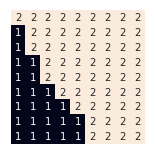

1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 0
1 (1, 1) 2
1 (1, 2) 0
1 (1, 1) 2
1 (1, 2) 2
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 1
0 (0, 1) 0
1 (0, 1) 1
1 (1, 1) 1
1 (1, 1) 2
0 (0, 1) 0
1 (1, 1) 2
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 1
1 (0, 1) 2
1 (0, 1) 2
1 (1, 2) 2
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 0
0 (0, 1) 0
1 (1, 1) 2
1 (1, 2) 0
1 (0, 1) 0
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 2
1 (0, 1) 2
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 0
0 (0, 2) 0
1 (1, 1) 1
1 (0, 1) 1
1 (1, 1) 2
1 (1, 2) 2
1 (1, 3) 1
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 0
1 (0, 1) 2
1 (0, 1) 1
0 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 1
0 (0, 2) 0
1 (2, 1) 1
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 2
1 (0, 1) 2
1 (0, 2) 2
1 (2, 3) 2
0 (0, 1) 0
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 2
1 (1, 2) 0
1 (0, 1) 1
1 (0, 1) 2
0 (0, 1) 0

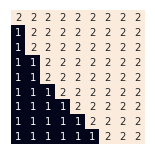

1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 0
1 (1, 1) 0
1 (1, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (1, 1) 2
1 (2, 2) 2
1 (2, 3) 2
1 (2, 4) 2
1 (2, 5) 2
1 (2, 6) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 1
1 (1, 1) 2
1 (1, 2) 2
1 (1, 3) 2
1 (0, 1) 2
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
0 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 1) 2
1 (1, 2) 1
1 (1, 1) 1
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 2
1 (1, 2) 1
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 0
1 (0, 1) 2
1 (1, 2) 2
1 (1, 3) 2
1 (3, 4) 0
0 (0, 1) 0
1 (0, 1) 0
1 (1, 1) 0
1 (0, 1) 2
1 (0, 2) 0
1 (1, 1) 1
1 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 2
1 (0, 1) 1
0 (0, 1) 0
1 (0, 1) 1
1 (1, 1) 2
1 (0, 1) 2
1 (0, 1) 2
1 (0, 2) 1
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 2
1 (1, 2) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 2
1 (0, 1) 2

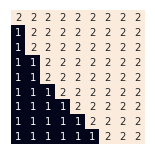

1 (1, 1) 0
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 0
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 1
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 2
1 (0, 1) 0
1 (0, 1) 0
0 (0, 1) 0
1 (1, 1) 2
1 (2, 2) 0
1 (1, 1) 2
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 0
0 (0, 1) 0
1 (1, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 0
1 (0, 1) 1
1 (1, 1) 1
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 0
1 (1, 1) 1
0 (0, 1) 0
1 (0, 1) 0
1 (2, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (1, 1) 2
1 (1, 2) 0
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 2
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 0
1 (1, 1) 2
0 (0, 1) 0
1 (0, 1) 1
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 2
1 (0, 4) 2

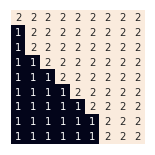

1 (0, 1) 2
1 (0, 2) 2
1 (1, 3) 2
1 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 0
1 (0, 1) 2
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (1, 1) 2
1 (1, 2) 1
1 (1, 1) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (1, 2) 2
1 (0, 1) 1
1 (0, 1) 2
1 (0, 1) 2
1 (1, 1) 2
1 (1, 2) 0
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 2
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 1
1 (0, 1) 0
1 (1, 1) 1
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 0
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 1
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 0
0 (0, 1) 0
0 (0, 2) 0
1 (0, 1) 1
1 (0, 1) 0
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 1
1 (1, 1) 2
1 (1, 2) 1
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 1
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (2, 2) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 2
1 (2, 2) 0
1 (0, 1) 2
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 0
1 (0, 1) 1
1 (0, 1) 1
1 (1, 1) 1
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 0
1 (0, 1) 2
1 (1, 2) 0

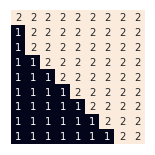

1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 0
0 (0, 2) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 1
1 (0, 1) 0
0 (0, 2) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 0
0 (0, 1) 0
0 (0, 1) 0
1 (1, 1) 2
1 (1, 2) 0
1 (0, 1) 2
1 (0, 2) 0
0 (0, 1) 0
0 (0, 1) 0
0 (0, 2) 0
1 (0, 1) 2
1 (0, 1) 1
1 (0, 1) 0
1 (1, 1) 2
1 (2, 1) 0
0 (0, 1) 0
0 (0, 2) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 2
1 (0, 4) 2
1 (0, 5) 2
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 0
1 (1, 1) 0
1 (0, 1) 2
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 0
0 (0, 1) 0
1 (1, 1) 1
0 (0, 1) 0
1 (0, 1) 2
0 (0, 1) 0
1 (0, 1) 2
1 (1, 2) 0
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 0
1 (2, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 1
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 1
0 (0, 1) 0
1 (0, 1) 0
0 (0, 1) 0
1 (1, 1) 2
1 (2, 2) 0
1 (0, 1) 2
1 (1, 2) 2
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 2
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 0

0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 1
1 (1, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (1, 2) 1
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 1
0.9322301194154049 -1131.0465850830078


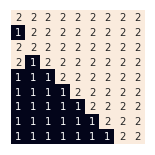

0 (0, 1) 0
1 (1, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 1
0 (0, 1) 0
1 (0, 1) 0
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 1
1 (1, 1) 1
1 (0, 1) 2
1 (0, 1) 2
1 (1, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 2
1 (2, 1) 1
0 (0, 1) 0
1 (1, 1) 2
1 (1, 2) 0
1 (0, 1) 1
0 (0, 2) 0
1 (1, 1) 2
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 2
1 (0, 1) 2
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 1
0 (0, 1) 0
1 (0, 1) 1
1 (1, 1) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 1
1 (1, 1) 1
1 (0, 1) 0
1 (0, 1) 2
0 (0, 2) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 1
1 (0, 1) 0
0 (0, 1) 0
1 (1, 1) 1
0 (0, 1) 0
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 1
1 (1, 1) 0
1 (1, 1) 2
0 (0, 2) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 1
1 (0, 1) 1
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (1, 2) 1
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 1

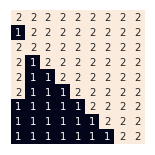

0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 2
1 (0, 4) 1
1 (0, 1) 1
1 (0, 1) 1
1 (1, 1) 2
1 (1, 2) 2
1 (1, 3) 2
1 (1, 1) 2
1 (1, 2) 0
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 2
1 (2, 2) 0
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
0 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 1
1 (0, 1) 1
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 2
1 (1, 3) 0
1 (0, 1) 2
1 (0, 2) 0
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
0 (0, 1) 0
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 0
1 (0, 1) 2
1 (1, 2) 2
1 (1, 3) 0
1 (1, 1) 1
1 (1, 1) 1
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (1, 2) 2
1 (0, 1) 0
1 (0, 1) 2
1 (1, 1) 1
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
0 (0, 2) 0
1 (0, 1) 2
1 (0, 2) 2
1 (1, 1) 0
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 1
1 (0, 1) 0
1 (1, 1) 0
1 (0, 1) 2
0 (0, 1) 0
1 (0, 1) 2

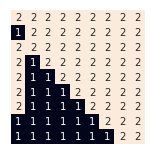

1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 2
1 (1, 2) 2
1 (1, 3) 2
1 (1, 4) 1
1 (0, 1) 1
1 (0, 1) 2
0 (0, 1) 0
1 (1, 1) 0
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
0 (0, 1) 0
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 1
0 (0, 1) 0
0 (0, 1) 0
1 (1, 1) 2
1 (1, 2) 1
1 (1, 1) 0
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 1) 1
0 (0, 1) 0
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 2
1 (0, 1) 0
0 (0, 1) 0
1 (1, 1) 1
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 2
1 (0, 4) 0
0 (0, 1) 0
1 (0, 1) 0
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 0
0 (0, 1) 0
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
0 (0, 1) 0
1 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 2
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 0
1 (0, 1) 2
1 (0, 1) 0
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2

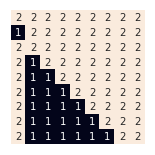

1 (0, 1) 2
1 (0, 2) 1
1 (1, 1) 0
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 1
1 (1, 1) 1
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 0
1 (0, 1) 2
0 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 1
1 (0, 1) 0
0 (0, 1) 0
1 (1, 1) 2
1 (1, 2) 0
1 (0, 1) 2
1 (0, 1) 2
1 (0, 2) 2
1 (0, 3) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 1
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 0
1 (1, 1) 2
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 2
1 (1, 1) 0
1 (0, 1) 2
1 (0, 2) 1
0 (0, 2) 0
1 (0, 1) 1
1 (0, 1) 1
1 (0, 1) 0
0 (0, 1) 0
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 0
1 (1, 1) 2
0 (0, 1) 0
1 (1, 1) 0
1 (1, 1) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 2
1 (0, 1) 0
1 (1, 1) 0
0 (0, 1) 0
0 (0, 1) 0
1 (0, 1) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 2
1 (0, 2) 0
1 (0, 1) 1
1 (0, 1) 2
1 (0, 2) 2
0 (0, 1) 0
1 (0, 1) 0
1 (1, 1) 2
1 (1, 2) 2
1 (1, 3) 0
1 (0, 1) 2
1 (0, 2) 1
1 (0, 1) 2
1 (1, 2) 1

In [ ]:
n_episodes=2000 
max_t=1000
eps_start=1.0
eps_end=0.1
eps_decay=0.995

scores = []
first_override = []
eps = eps_start
for i_episode in range(1, n_episodes + 1):
    env.reset()
    episode_reward = 0
    for t in range(max_t):
        episode_reward += runTurn(eps, verbose=False)
    eps = max(eps_end, eps*eps_decay)
    print(eps, episode_reward)
    plotPolicy(agents[1])

In [ ]:
env.chain.count('1') / len(env.chain)

In [ ]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.1, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    first_override = []
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(np.asarray(state), eps)
            next_state, reward = env.takeAction(action)
            reward_val = evalReward(reward)
            agent.step(state, action, reward_val, next_state)
            state = next_state
            score += reward_val
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps*eps_decay) # decrease epsilon
        print('\rEpisode {}\t  Score: {:.2f}'.format(i_episode, np.mean(score)))
        print(eps)
        # plot 
        policy = agent.extractPolicy()
        if policy[(1,0)] == 2:
            first_override.append(i_episode)
        f, ax = plt.subplots(figsize=(3,3))
        ax.imshow(policy)
        ax = sns.heatmap(policy, annot=True)
        cb = ax.collections[-1].colorbar   
        cb.remove()
        plt.xticks([])
        plt.yticks([])
        plt.show()
    return scores, first_override

scores, overrides = dqn()

In [ ]:
state = torch.from_numpy(np.asarray([1, 0])).float().unsqueeze(0).to("cpu")
agent.qnetwork_local.eval()
with torch.no_grad():
    action_values = agent.qnetwork_local(state)

In [ ]:
action_values

In [ ]:
# plot the scores
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
np.mean(scores[500:])

In [ ]:
0.35*1000 * (1 - rho) - rho * 0.35*1000